In [1]:
import kagglehub
# Download latest version
path = kagglehub.dataset_download("johnsmith88/heart-disease-dataset")
print("Path to dataset files:", path)

100%|██████████| 6.18k/6.18k [00:00<00:00, 10.8MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/johnsmith88/heart-disease-dataset/versions/2


In [2]:
import os
import pandas as pd
file_path = os.path.join(path, "heart.csv")
df = pd.read_csv(file_path)

In [3]:
df.shape

(1025, 14)

In [4]:
df[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [6]:
from sklearn.linear_model import LogisticRegression

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [8]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
corr_matrix = df.corr()

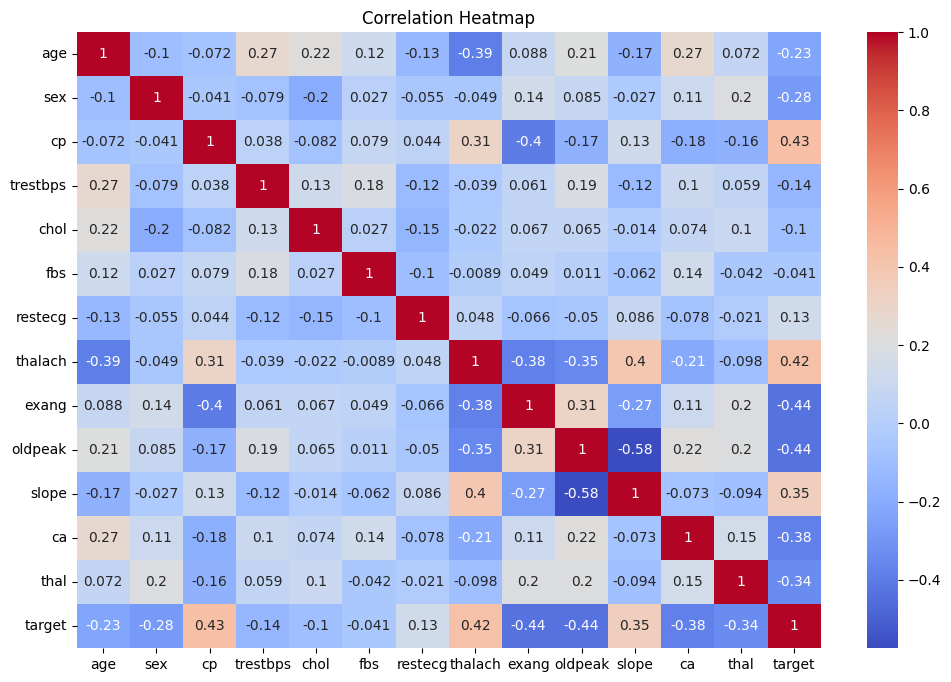

In [11]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True,cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

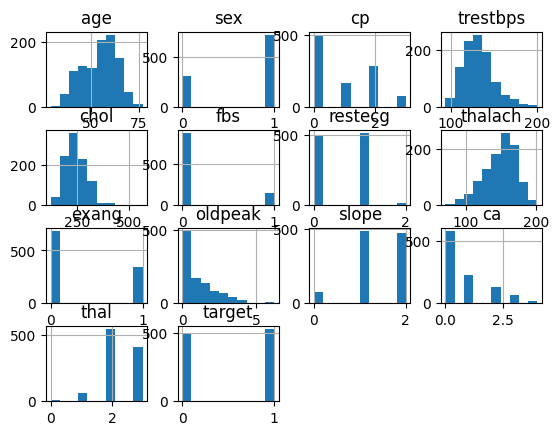

In [12]:
df.hist()

<Axes: xlabel='target', ylabel='count'>

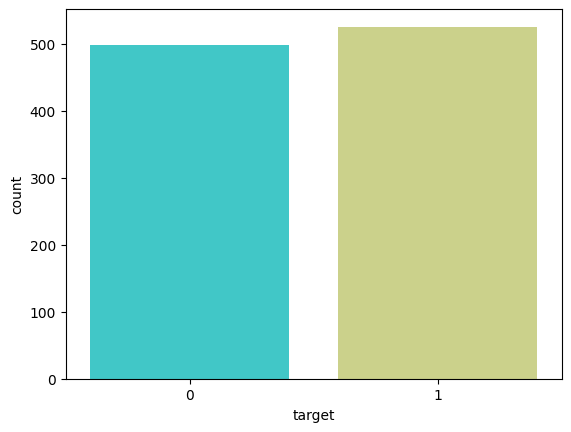

In [13]:
sns.set_style()
sns.countplot(x='target',data=df,palette='rainbow')

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = df.drop(columns=['target'])
y = df['target']

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

Training The Model with The Logistic Regression

In [17]:
model = LogisticRegression()

In [18]:
model.fit(X_train,y_train)

LogisticRegression()

In [19]:
from sklearn.metrics import accuracy_score
y_pred_train = model.predict(X_train)
accuracy_score(y_train,y_pred_train)

0.8658536585365854

In [20]:
y_pred_test = model.predict(X_test)
accuracy_score(y_test,y_pred_test)

0.7853658536585366

Training The Model With the Random Forest Classifier Model

In [21]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier()
model1.fit(X_train,y_train)

RandomForestClassifier()

In [22]:
r_pred_train = model1.predict(X_train)
accuracy_score(y_train,r_pred_train)

1.0

In [23]:
r_pred_test = model1.predict(X_test)
accuracy_score(y_test,r_pred_test)

0.9853658536585366

In [24]:
def predict_heart_disease(age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal):
    input_data = np.array([[age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]])
    prediction = model1.predict(input_data)[0]
    probability = model1.predict_proba(input_data)[0][1]
    if prediction == 1:
        return f"High risk of heart disease! (Probability: {probability:.2f})"
    else:
        return f"Low risk of heart disease. (Probability: {probability:.2f})"

In [25]:
print(predict_heart_disease(63, 1, 3, 145, 233, 1, 0, 110, 0, 2.3, 0, 0, 1))

High risk of heart disease! (Probability: 0.81)


In [26]:
import joblib
joblib.dump(model1, 'heart_disease_model.pkl')
print("Model Saved Successfully!")

Model Saved Successfully!


In [27]:
!ls /content/

heart_disease_model.pkl  sample_data


In [28]:
from google.colab import files
files.download('heart_disease_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>